## Rozdelenie dát

Súbor: rozdelenie_dat.ipynb

Program: Hospodárska informatika

Vypracovala: Terézia Drengubiaková

Bakalárska práca: : Prediktívne modely v spracovaní dát z oblasti kozmického počasia

Vedúci diplomovej práce: doc. Ing. Peter Butka, PhD.

Konzultanti: Ing. Viera Maslej Krešňáková, PhD., RNDr. Šimon Mackovjak, PhD.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [2]:
df = pd.read_csv('allDST_omni.csv')

In [3]:
df['time1'] = pd.to_datetime(df['time1'])

In [4]:
split_index = df[df['time1'] >= '2003-11-19'].index.min()

In [5]:
train = df.iloc[:split_index, :]
test = df.iloc[split_index:, :]

In [6]:
train.tail()

,Unnamed: 0,time1,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,...,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI,DST+1,DST+2,DST+3,DST+4,DST+5,DST+6
358402,358402,2003-11-18 19:00:00,2324.0,71.0,71.0,15.0,15.0,4.0,2.6,6.900000,...,67.0,0.2,0.007631,0.0066,-22.0,-20.0,-16.0,-15.0,-17.0,-15.0
358403,358403,2003-11-18 20:00:00,2324.0,71.0,71.0,15.0,15.0,3.8,1.3,-7.500000,...,73.0,1.0,0.007631,0.0073,-20.0,-16.0,-15.0,-17.0,-15.0,-18.0
358404,358404,2003-11-18 21:00:00,2324.0,71.0,71.0,15.0,15.0,3.9,2.2,60.299999,...,77.0,-0.2,0.007631,0.0065,-16.0,-15.0,-17.0,-15.0,-18.0,-18.0
358405,358405,2003-11-18 22:00:00,2324.0,71.0,71.0,15.0,15.0,3.4,2.4,-2.700000,...,59.0,1.4,0.007631,0.0053,-15.0,-17.0,-15.0,-18.0,-18.0,-18.0
358406,358406,2003-11-18 23:00:00,2324.0,71.0,71.0,14.0,14.0,3.6,2.6,-15.500000,...,99.0,2.7,0.007631,0.0074,-17.0,-15.0,-18.0,-18.0,-18.0,-22.0


In [7]:
test = test[["time1", "BZ_GSM", "KP", "DST", "DST+1", "DST+2", "DST+3", "DST+4", "DST+5", "DST+6"]]

In [8]:
test.head()

,time1,BZ_GSM,KP,DST,DST+1,DST+2,DST+3,DST+4,DST+5,DST+6
358407,2003-11-19 00:00:00,0.6,23.0,-15.0,-15.0,-18.0,-18.0,-18.0,-22.0,-27.0
358408,2003-11-19 01:00:00,0.2,23.0,-18.0,-18.0,-18.0,-18.0,-22.0,-27.0,-26.0
358409,2003-11-19 02:00:00,0.2,23.0,-18.0,-18.0,-18.0,-22.0,-27.0,-26.0,-26.0
358410,2003-11-19 03:00:00,0.3,23.0,-18.0,-18.0,-22.0,-27.0,-26.0,-26.0,-25.0
358411,2003-11-19 04:00:00,-1.2,23.0,-22.0,-22.0,-27.0,-26.0,-26.0,-25.0,-21.0


In [9]:
print(len(test))
print(len(train))

162036
358407


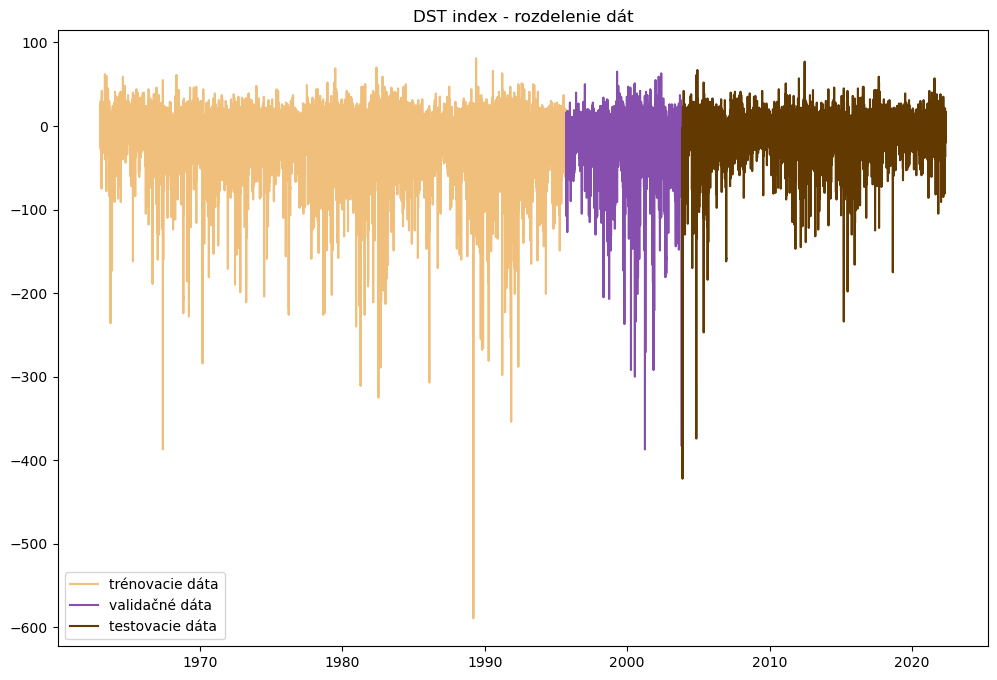

In [10]:
valid_size = int(len(train) * 0.2)
valid = train.iloc[-valid_size:,:].copy()
train = train.iloc[:-valid_size,:].copy()

plt.rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.title("DST index - rozdelenie dát")
plt.plot(train['time1'],train['DST'],label='trénovacie dáta', color="#EFBF7B")
plt.plot(valid['time1'],valid['DST'],label='validačné dáta', color="#864FAD")
plt.plot(test['time1'],test['DST'],label='testovacie dáta', color="#623900")
plt.savefig("dataset_cut.png")
plt.legend();

In [11]:
test.to_csv('test_omni.csv')
train.to_csv('train_omni.csv')